In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [3]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    x = tf.placeholder(tf.float32, name = 'x')

    sigmoid = tf.sigmoid(x)

    with tf.Session() as sess: 
        result = sess.run(sigmoid, feed_dict = {x: z})
    
    return result

In [4]:

def cost_mse(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    # Create the placeholders for "logits" (z) and "labels" (y)
    z = tf.placeholder(tf.float32, name = 'z')
    y = tf.placeholder(tf.float32, name = 'y')
    
    # Use the loss function
    cost = tf.nn.l2_loss(tf.subtract(z, y))
    
    # Create a session.
    sess = tf.Session()
    cost = sess.run(cost, feed_dict = {z: logits, y: labels})
    
    # Close the session.
    sess.close()
    
    return cost

In [5]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    # Create the placeholders for "logits" (z) and "labels" (y)
    z = tf.placeholder(tf.float32, name = 'z')
    y = tf.placeholder(tf.float32, name = 'y')
    
    # Use the loss function
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    
    # Create a session.
    sess = tf.Session()
    cost = sess.run(cost, feed_dict = {z: logits, y: labels})
    
    # Close the session.
    sess.close()
    
    return cost

In [6]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    # Create a tf.constant equal to C (depth), name it 'C'.
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session 
    sess = tf.Session()
    
    # Run the session
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session
    sess.close()
    
    
    return one_hot

In [7]:
def createword2Vec(lebels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    labels = "train_array.csv"
    # embedding = get_dataset(labels).shuffle(1500).batch(1)
    embedding = pd.read_csv(labels)
    trainArray = np.array(embedding)
    print(trainArray)
    #now we want to find the 
    # Create a tf.constant equal to C (depth), name it 'C'.
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session 
    sess = tf.Session()
    
    # Run the session
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session
    sess.close()
    
    
    return one_hot

In [8]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    # Create "ones" tensor using tf.ones(...). 
    ones = tf.ones(shape)
    
    # Create the session
    sess = tf.Session()
    
    # Run the session to compute 'ones'
    ones = sess.run(ones)
    
    # Close the session.
    sess.close()

    return ones

In [9]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips:
    - Using None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.placeholder(tf.float32, shape= [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, shape= [n_y, None], name = "Y")
    
    return X, Y

In [10]:
def logistic_regression(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
        
    W1 = parameters['W1']
    b1 = parameters['b1']
    
    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X), b1)                                              # Z1 = np.dot(W1, X) + b1
    # A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
    
    return Z1

In [11]:
def forward_propagation(X, parameters, keep_prob = 1.0):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X), b1)                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
    D1 = tf.nn.dropout(A1,keep_prob)
    Z2 = tf.add(tf.matmul(W2,D1), b2)                                              # Z2 = np.dot(W2, D1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    D2 = tf.nn.dropout(A2,keep_prob)
    Z3 = tf.add(tf.matmul(W3,D2), b3)                                              # Z3 = np.dot(W3, D2) + b3
    
    return Z3

In [12]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [13]:
def compute_cost_squared(Z3,Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    # cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    cost = tf.nn.l2_loss(tf.subtract(labels, logits))
    
    return cost

In [14]:
def initialize_regression_parameters(use_binary_classification = True, use_word2vec=False):
    """
    Initializes parameters to build a neural network with tensorflow.
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1
    """
    
    tf.set_random_seed(1)
    num_outputs = 1
    if use_binary_classification:
        num_outputs = 2
    num_inputs = 510
    if use_word2vec:
        num_inputs = 210
    W1 = tf.get_variable("W1", [num_outputs,num_inputs], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [num_outputs,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1}
    
    return parameters

In [15]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True, use_linear = False, keep_prob=1.0, 
          use_binary_classification=True, use_word2vec = False):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    if use_linear:
        parameters = initialize_regression_parameters(use_binary_classification, use_word2vec)
        Z3 = logistic_regression(X, parameters)
    else: 
        parameters = initialize_parameters(use_binary_classification, use_word2vec)
        Z3 = forward_propagation(X, parameters, keep_prob)
    
    if use_binary_classification:
        cost = compute_cost(Z3, Y)
    else:
        cost = compute_cost_squared(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        if use_binary_classification:
            correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
            print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        else:
            correct_prediction = tf.nn.l2_loss(tf.subtract(Z3, Y))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print ("Train Cost:", accuracy.eval({X: X_train, Y: Y_train}))
            print ("Test Cost:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [16]:
use_linear = False
keep_prob=1.0
use_binary_classification=True
use_word2vec = True

### 2.7 - Test with your own image (optional / ungraded exercise)

Congratulations on finishing this assignment. You can now take a picture of your hand and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Write your image's name in the following code
    4. Run the code and check if the algorithm is right!

In [17]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

def get_dataset(file_path, **kwargs):
    df = pd.read_csv(file_path)
    target = df.pop('0')
    dataset = tf.contrib.data.Dataset.from_tensor_slices((df.values, target.values))
    return dataset

In [18]:
# Loading the dataset
train_dataset= get_dataset("trian_set.csv").shuffle(1500).batch(1)
# X_test_orig, Y_test_orig = get_dataset("test_set.csv").shuffle(359).batch(1)

In [19]:
train = pd.read_csv("trian_set.csv")

In [20]:
print(train)

        0        1        2        3        4        5        6        7  \
0     0.0  2681.02  2680.88  2680.89  2680.92  2680.58  2680.37  2680.40   
1     1.0  2554.23  2554.25  2554.34  2554.01  2553.90  2554.16  2554.16   
2     1.0  2494.45  2494.00  2494.42  2494.91  2494.96  2495.07  2495.03   
3     0.0  2506.70  2507.13  2506.72  2506.84  2506.97  2506.74  2506.54   
4     1.0  2890.07  2890.37  2890.48  2890.54  2891.89  2890.97  2889.70   
5     0.0  2747.50  2747.67  2747.69  2747.66  2747.65  2747.73  2747.40   
6     1.0  2783.66  2783.28  2783.52  2783.94  2782.92  2782.14  2781.31   
7     1.0  2381.08  2381.02  2381.09  2381.06  2381.27  2381.41  2381.35   
8     1.0  2746.22  2746.59  2746.48  2746.67  2746.72  2747.07  2746.74   
9     1.0  2750.57  2751.21  2752.31  2751.78  2751.15  2750.62  2750.08   
10    0.0  2792.43  2793.48  2792.93  2791.90  2790.30  2790.82  2790.41   
11    0.0  2443.27  2443.56  2443.61  2442.58  2443.03  2443.92  2444.39   
12    1.0  2

In [21]:
training_set = "trian_set_mse.csv"
test_set = "test_set_mse.csv"
numTestSamples = 359
if use_word2vec:
    numTestSamples = 621
if use_binary_classification:
    training_set = "trian_set.csv"
    test_set = "test_set.csv"
if use_word2vec:
    training_set = "total_array_train.csv" #input
    test_set = "total_array_test.csv" #input
train_dataset= get_dataset(training_set).shuffle(1500).batch(1)
train = pd.read_csv(training_set)
trainArray = np.array(train)
variances = np.var(trainArray[:, 1:10], axis=1)
std = np.sqrt(variances)
mean = np.sum(trainArray[:, 1:10], axis=1)/10
mean = mean.reshape(1500,1)
std = std.reshape(1500,1)
trainArray[:, :10] = (trainArray[:, :10] - mean)/std
X_train_orig = trainArray[:, 1:]
print(trainArray)
Y_train_orig = trainArray[:, 0].reshape(1,1500).astype(float)
if use_binary_classification:
    Y_train_orig = trainArray[:, 0].reshape(1,1500).astype(int)
if use_word2vec:
    Y_train_orig = (trainArray[:, 0] > trainArray[:, 1]).reshape(1,1500).astype(int)
if use_word2vec and not use_binary_classification:
    Y_train_orig = (trainArray[:, 0] - trainArray[:, 1]).reshape(1,1500).astype(float)
test = pd.read_csv(test_set)
testArray = np.array(test)
variances = np.var(testArray[:, 1:10], axis=1)
std = np.sqrt(variances)
mean = np.sum(testArray[:, 1:10], axis=1)/10
mean = mean.reshape(numTestSamples,1)
std = std.reshape(numTestSamples,1)
testArray[:, :10] = (testArray[:, :10] - mean)/std
X_test_orig = testArray[:, 1:]
Y_test_orig = testArray[:, 0].reshape(1,numTestSamples).astype(float)
if use_binary_classification:
    Y_test_orig = testArray[:, 0].reshape(1,numTestSamples).astype(int)
if use_word2vec:
    Y_test_orig = (testArray[:, 0] > testArray[:, 1]).reshape(1,numTestSamples).astype(int)
if use_word2vec and not use_binary_classification:
    Y_test_orig = (testArray[:, 0] - testArray[:, 1]).reshape(1,numTestSamples).astype(float)
print(X_train_orig.shape)
print(Y_train_orig.shape)

[[  7.01517522e+02   7.03356449e+02   7.04275912e+02 ...,   9.45902000e-01
    2.35500000e-01  -6.03433000e-01]
 [  7.85955151e+01   7.51127900e+01   7.56118499e+01 ...,   8.05732000e-01
   -1.58547700e+00  -4.92757300e+00]
 [  1.96888998e+02   1.97767893e+02   1.97804514e+02 ...,   5.83068000e-01
   -8.63542000e-01  -3.35342300e+00]
 ..., 
 [  6.47062547e+02   6.45307351e+02   6.45284256e+02 ...,   6.59360100e+00
   -4.46080200e+00  -3.42585000e-01]
 [  8.94689130e+02   8.90568377e+02   8.90983646e+02 ...,   2.74875100e+00
   -1.61028900e+00   1.68555500e+00]
 [  1.41457014e+03   1.41477272e+03   1.41573497e+03 ...,   5.85406000e-01
   -2.54692800e+00  -6.85100000e+00]]
(1500, 210)
(1, 1500)


In [22]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten
X_test = X_test_flatten
# Convert training and test labels to one hot matrices
if use_binary_classification:
    Y_train = convert_to_one_hot(Y_train_orig,2)
    Y_test = convert_to_one_hot(Y_test_orig,2)
else:
    Y_train = Y_train_orig
    Y_test = Y_test_orig

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1500
number of test examples = 621
X_train shape: (210, 1500)
Y_train shape: (2, 1500)
X_test shape: (210, 621)
Y_test shape: (2, 621)


In [23]:
X, Y = create_placeholders(510, 1)
if use_binary_classification:
    X, Y = create_placeholders(510, 2)
if use_word2vec:
    X, Y = create_placeholders(210, 2)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_2:0", shape=(210, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(2, ?), dtype=float32)


In [24]:
def initialize_parameters(use_binary_classification=True, use_word2vec=False):
    """
    Initializes parameters to build a neural network with tensorflow.
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)
    num_outputs = 1
    num_inputs = 510
    if use_binary_classification:
        num_outputs = 2
    if use_word2vec:
        num_inputs = 210
        
    W1 = tf.get_variable("W1", [25,num_inputs], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [num_outputs,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [num_outputs,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

Cost after epoch 0: 84.278019
Cost after epoch 100: 0.678322
Cost after epoch 200: 0.628948
Cost after epoch 300: 0.602756
Cost after epoch 400: 0.600136
Cost after epoch 500: 0.568606
Cost after epoch 600: 0.549732
Cost after epoch 700: 0.542183
Cost after epoch 800: 0.557238
Cost after epoch 900: 0.503493
Cost after epoch 1000: 0.586134
Cost after epoch 1100: 0.506449
Cost after epoch 1200: 0.465861
Cost after epoch 1300: 0.463671
Cost after epoch 1400: 0.459083


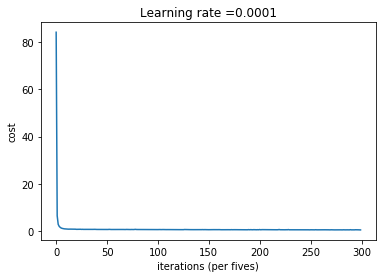

Parameters have been trained!
Train Accuracy: 0.776667
Test Accuracy: 0.499195


In [25]:
parameters = model(X_train, Y_train, X_test, Y_test, use_linear=use_linear, keep_prob=keep_prob, use_binary_classification=use_binary_classification, use_word2vec = use_word2vec)

In [26]:
# train_dataset = get_dataset("tweets.csv").shuffle(len(df)).batch(1)
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [27]:
model = get_compiled_model()
# model.fit(train_dataset, epochs=15)
dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'), target.values)).batch(16)
model_func.fit(dict_slices, epochs=15)

AttributeError: module 'tensorflow' has no attribute 'keras'

In [ ]:
def show_batch(dataset):
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))





In [ ]:
def read_from_csv(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    _, csv_row = reader.read(filename_queue)
    record_defaults = [[0],[0],[0],[0],[0]]
    colHour,colQuarter,colAction,colUser,colLabel = tf.decode_csv(csv_row, record_defaults=record_defaults)
    features = tf.stack([colHour,colQuarter,colAction,colUser])  
    label = tf.stack([colLabel])  
    return features, label

filenames = ["tweets.csv"]

filename_queue = tf.train.string_input_producer(filenames, num_epochs=1, shuffle=False)
example, country = create_file_reader_ops(filename_queue)

In [ ]:
train_file_path = "tweets.csv"
test_file_path = "tweets.csv"
raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

In [ ]:
import csv
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_file = "tweets.csv"
## END CODE HERE ##
LABEL_COLUMN = 'survived'
LABELS = [0, 1]





with open(my_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} tweets.')
    my_training_set = predict()
    # Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset() #TODO: change this so that it works

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))